# 01. Analysis Seoul CCTV

In [1]:
import pandas as pd

In [2]:
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding="utf-8")

In [3]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204


In [5]:
CCTV_Seoul.head(10)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613
5,광진구,878,573,78,53,174
6,구로구,1884,1142,173,246,323
7,금천구,1348,674,51,269,354
8,노원구,1566,542,57,451,516
9,도봉구,825,238,159,42,386


In [6]:
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [7]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [8]:
CCTV_Seoul.columns[0]

'기관명'

In [9]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: "구별"}, inplace=True)

In [10]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [11]:
pop_Seoul = pd.read_excel(
    "../data/01. Seoul_Population.xls", header=2, usecols="B, D, G, J, N"
)

In [12]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [13]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0]: "구별",
        pop_Seoul.columns[1]: "인구수",
        pop_Seoul.columns[2]: "한국인",
        pop_Seoul.columns[3]: "외국인",
        pop_Seoul.columns[4]: "고령자",
    },
    inplace=True
)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


## Pandas 기초
- 파이썬에서 R 만큼의 강력한 데이터 핸들링 성능을 제공하는 모듈
- 단일 프로세스에서는 최대 효율
- 코딩 가능하고 응용 가능한 엑셀로 받아들여도 됨
- 누군가 스테로이드를 맞은 엑셀로 표현함

#### Series
- index와 value로 이러우져 있다.
- 한가지 데이터 타입으로 이루어짐.

In [14]:
import pandas as pd
import numpy as np

- pandas는 통상 pd
- numpy는 통상 np

In [15]:
pd.Series()

C:\Users\sanghui\AppData\Local\Temp/ipykernel_12916/2031691219.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

In [16]:
pd.Series([1, 2, 3, 4])

0    1
1    2
2    3
3    4
dtype: int64

In [17]:
pd.Series([1,2,3,4], dtype=float64)

NameError: name 'float64' is not defined

- 공식 문서 보면서 트러블 슈팅한거 유심히 생각해 볼것

In [18]:
pd.Series([1,2,3,4], dtype=np.float64)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [19]:
pd.Series([1,2,3,4], dtype=str)

0    1
1    2
2    3
3    4
dtype: object

In [20]:
pd.Series(np.array([1,2,3]))

0    1
1    2
2    3
dtype: int32

In [21]:
pd.Series({"Key": "Value"})

Key    Value
dtype: object

In [22]:
pd.Series([1,2,3,4,"5"])

0    1
1    2
2    3
3    4
4    5
dtype: object

In [23]:
data = pd.Series([1, 2, 3, 4, "5"])
data

0    1
1    2
2    3
3    4
4    5
dtype: object

In [24]:
# 짝수를 찾고 싶다
data = pd.Series([1, 2, 3, 4])

In [25]:
data % 2

0    1
1    0
2    1
3    0
dtype: int64

#### 날짜 데이터

In [26]:
pd.date_range("20210101", periods=6)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

### DataFrame
- pd.Series()
    - index, value
- pd.DataFrame()
    - index, value, column

- shift + tab => docstring 볼 수 있음. 내가 사용할 메서드의 기본 정보를 미리 파악해 볼 수 있다.

In [27]:
# 표준정규분포에서 샘플링한 난수 생성
data = np.random.randn(6,4)
dates = pd.date_range("20210101", periods=6)

In [28]:
df = pd.DataFrame(data, index = dates, columns=["A", "B", "C", "D"])
df

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


### 데이터 프레임 정보 탐색

In [29]:
df.head()

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214


In [30]:
# 데이터 갯수 파악하기 좋음
df.tail()

,A,B,C,D
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


In [31]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [32]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [33]:
df.values

array([[ 0.09964391, -1.46579021, -0.50408572, -0.14327264],
       [ 0.48447787,  0.47485843, -0.07072887,  0.22752035],
       [ 0.1275156 ,  0.00315999, -0.37611524, -0.14874127],
       [ 0.9346577 ,  0.83577203, -0.06252649, -0.72970083],
       [ 0.33697911, -0.86803371,  1.02545251, -1.17921418],
       [-0.59396622, -1.38296335,  1.12107577,  0.6341412 ]])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2021-01-01 to 2021-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [35]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.231551,-0.400499,0.188845,-0.223211
std,0.505796,0.977367,0.706946,0.651248
min,-0.593966,-1.465790,-0.504086,-1.179214
25%,0.106612,-1.254231,-0.299769,-0.584461
50%,0.232247,-0.432437,-0.066628,-0.146007
75%,0.447603,0.356934,0.753458,0.134822
max,0.934658,0.835772,1.121076,0.634141


### 데이터 정렬
- sort_values()
- 특정 컬럼(열)을 기준으로 데이터를 정렬함

In [36]:
df

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


In [37]:
# df.sort_values(by="B", ascending=False, inplace=True) 실제 파일에 내용 반영
df.sort_values(by="B", ascending=False)

,A,B,C,D
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273


In [38]:
df

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


### 데이터 선택

In [39]:
df

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


In [40]:
df["A"]

2021-01-01    0.099644
2021-01-02    0.484478
2021-01-03    0.127516
2021-01-04    0.934658
2021-01-05    0.336979
2021-01-06   -0.593966
Freq: D, Name: A, dtype: float64

In [41]:
type(df["A"])

pandas.core.series.Series

In [42]:
df.A

2021-01-01    0.099644
2021-01-02    0.484478
2021-01-03    0.127516
2021-01-04    0.934658
2021-01-05    0.336979
2021-01-06   -0.593966
Freq: D, Name: A, dtype: float64

In [43]:
# 두 개 이상 컬럼 선택
df[["A", "B"]]

,A,B
2021-01-01,0.099644,-1.465790
2021-01-02,0.484478,0.474858
2021-01-03,0.127516,0.003160
2021-01-04,0.934658,0.835772
2021-01-05,0.336979,-0.868034
2021-01-06,-0.593966,-1.382963


### offset index
- [n:m] : n부터 m-1까지
- 인덱스나 컬럼의 이름으로 slice 하는 경우는 끝을 포함합니다.

In [44]:
df

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


In [45]:
df[0:3]

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741


In [46]:
df["20210101":"20210104"]

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701


- loc : location
- index 이름으로(레이블?) 특정 행, 열을 선택함

In [47]:
df

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


In [48]:
df.loc[:, ["A", "B"]]

,A,B
2021-01-01,0.099644,-1.465790
2021-01-02,0.484478,0.474858
2021-01-03,0.127516,0.003160
2021-01-04,0.934658,0.835772
2021-01-05,0.336979,-0.868034
2021-01-06,-0.593966,-1.382963


In [49]:
df.loc["20210102":"20210104",["A","D"]]

,A,D
2021-01-02,0.484478,0.227520
2021-01-03,0.127516,-0.148741
2021-01-04,0.934658,-0.729701


In [50]:
df.loc["20210102":"20210104", "A":"D"]

,A,B,C,D
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701


In [51]:
df

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


In [52]:
df.loc["20210102",["A","B"]]

A    0.484478
B    0.474858
Name: 2021-01-02 00:00:00, dtype: float64

- iloc : integer location
    - 컴퓨터가 인식하는 인덱스 값으로 선택

In [53]:
df

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


In [54]:
df.iloc[3]

A    0.934658
B    0.835772
C   -0.062526
D   -0.729701
Name: 2021-01-04 00:00:00, dtype: float64

In [55]:
df.iloc[3,2]

-0.06252649060591133

In [56]:
df.iloc[3:5, 0:2]

,A,B
2021-01-04,0.934658,0.835772
2021-01-05,0.336979,-0.868034


In [57]:
df.iloc[[1,2,4],[0,2]]

,A,C
2021-01-02,0.484478,-0.070729
2021-01-03,0.127516,-0.376115
2021-01-05,0.336979,1.025453


### condition

In [58]:
df

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


In [59]:
# A 칼럼에서 0보다 큰 숫자(양수)만 선택
df["A"] > 0

2021-01-01     True
2021-01-02     True
2021-01-03     True
2021-01-04     True
2021-01-05     True
2021-01-06    False
Freq: D, Name: A, dtype: bool

In [60]:
# 마스킹
df[df["A"] > 0]

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214


In [61]:
df

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


In [62]:
df[df > 0]

,A,B,C,D
2021-01-01,0.099644,NaN,NaN,NaN
2021-01-02,0.484478,0.474858,NaN,0.227520
2021-01-03,0.127516,0.003160,NaN,NaN
2021-01-04,0.934658,0.835772,NaN,NaN
2021-01-05,0.336979,NaN,1.025453,NaN
2021-01-06,NaN,NaN,1.121076,0.634141


### 컬럼 추가
- 기존 칼럼 없으면 추가
- 기존 칼럼 있으면 수정

In [63]:
df

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


In [64]:
df["E"] = ["one", "two", "three", "four", "four", "six"]

In [65]:
df

,A,B,C,D,E
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273,one
2021-01-02,0.484478,0.474858,-0.070729,0.227520,two
2021-01-03,0.127516,0.003160,-0.376115,-0.148741,three
2021-01-04,0.934658,0.835772,-0.062526,-0.729701,four
2021-01-05,0.336979,-0.868034,1.025453,-1.179214,four
2021-01-06,-0.593966,-1.382963,1.121076,0.634141,six


- isin()
- 특정 메서드가 있는지 확인하는 메서드

In [66]:
df["E"].isin(["two"])

2021-01-01    False
2021-01-02     True
2021-01-03    False
2021-01-04    False
2021-01-05    False
2021-01-06    False
Freq: D, Name: E, dtype: bool

In [67]:
df[df["E"].isin(["one","two","four"])]

,A,B,C,D,E
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273,one
2021-01-02,0.484478,0.474858,-0.070729,0.227520,two
2021-01-04,0.934658,0.835772,-0.062526,-0.729701,four
2021-01-05,0.336979,-0.868034,1.025453,-1.179214,four


### 특정 칼럼 제거
- del
- drop

In [68]:
df

,A,B,C,D,E
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273,one
2021-01-02,0.484478,0.474858,-0.070729,0.227520,two
2021-01-03,0.127516,0.003160,-0.376115,-0.148741,three
2021-01-04,0.934658,0.835772,-0.062526,-0.729701,four
2021-01-05,0.336979,-0.868034,1.025453,-1.179214,four
2021-01-06,-0.593966,-1.382963,1.121076,0.634141,six


In [69]:
del df["E"]
df

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


In [70]:
df.drop(["D"], axis=1) # axis = 0 가로, axis = 1 세로

,A,B,C
2021-01-01,0.099644,-1.465790,-0.504086
2021-01-02,0.484478,0.474858,-0.070729
2021-01-03,0.127516,0.003160,-0.376115
2021-01-04,0.934658,0.835772,-0.062526
2021-01-05,0.336979,-0.868034,1.025453
2021-01-06,-0.593966,-1.382963,1.121076


In [71]:
df

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


In [72]:
df["A"].apply("sum")

1.3893079755966014

In [73]:
df

,A,B,C,D
2021-01-01,0.099644,-1.465790,-0.504086,-0.143273
2021-01-02,0.484478,0.474858,-0.070729,0.227520
2021-01-03,0.127516,0.003160,-0.376115,-0.148741
2021-01-04,0.934658,0.835772,-0.062526,-0.729701
2021-01-05,0.336979,-0.868034,1.025453,-1.179214
2021-01-06,-0.593966,-1.382963,1.121076,0.634141


In [74]:
def plusminus(num):
    return "plus" if num > 0 else "minus"


df["A"].apply(plusminus)

2021-01-01     plus
2021-01-02     plus
2021-01-03     plus
2021-01-04     plus
2021-01-05     plus
2021-01-06    minus
Freq: D, Name: A, dtype: object

In [75]:
df["A"].apply(lambda num: "+" if num > 0 else "-")

2021-01-01    +
2021-01-02    +
2021-01-03    +
2021-01-04    +
2021-01-05    +
2021-01-06    -
Freq: D, Name: A, dtype: object

---

## CCTV 데이터 훑어보기

In [76]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [77]:
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [78]:
CCTV_Seoul.sort_values(by="소계", ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [79]:
 CCTV_Seoul["최근증가율"] = (
     (CCTV_Seoul["2016년"] + CCTV_Seoul["2015년"] + CCTV_Seoul["2014년"]) / CCTV_Seoul["2013년도 이전"]  * 100
 )
    
CCTV_Seoul.sort_values(by="최근증가율", ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 3.인구현황 데이터 훑어보기

In [80]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [81]:
pop_Seoul.drop([0], axis=0, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [82]:
pop_Seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [83]:
len(pop_Seoul["구별"].unique())

25

In [84]:
#외국인 비율, 고령자 비율

pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100

In [85]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [86]:
pop_Seoul.sort_values(["인구수"], ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


---
## 4. 두 데이터 합치기

#### Pandas에서 데이터 프레임을 병합하는 방법
- pd.concat()
- pd.merge()
- pd.join()

In [87]:
# 딕셔너리 안에 리스트 형태

left = pd.DataFrame({
    "key": ["K0", "K4", "K2", "K3"],
    "A": ["A0", "A1", "A2", "A3"],
    "B": ["B0", "B1", "B2", "B3"]
})

left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [88]:
# 리스트 안의 딕셔너리 형태

right = pd.DataFrame([
    {"key":"K0", "C":"C0", "D":"D0"},
    {"key":"K1", "C":"C1", "D":"D1"},
    {"key":"K2", "C":"C2", "D":"D2"},
    {"key":"K3", "C":"C3", "D":"D3"},
])

right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


### pd.merge()
- 두 데이터 프레임에서 컬럼이나 인덱스를 기준으로 잡고 병합하는 방법
- 기준이 되는 컬럼이나 인덱스를 키값이라고 합니다.
- 기준이 되는 키값은 두 데이터 프레임에 모두 포함되어 있어야 한다.

In [89]:
pd.merge(left,right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [90]:
pd.merge(left,right, how="left", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [91]:
pd.merge(left,right, how="right", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [92]:
pd.merge(left,right, how="outer", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [93]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


---

In [97]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 년도별 데이터 칼럼 삭제
- del
- drop()

In [103]:
# del data_result["2013년도 이전"]
# del data_result["2014년"]
data_result.drop(["2015년", "2016년"], axis=1, inplace=True)

In [104]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 인덱스 변경
- set_index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [105]:
data_result.set_index("구별", inplace=True)

In [106]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 상관계수
- corr()
- correlation 의 약자이다
- 상관계수가 0.2 이상인 데이터를 비교


In [107]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [108]:
data_result

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865
구로구,1884,64.973730,441559,410742,30817,58794,6.979135,13.315095
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769
노원구,1566,188.929889,558075,554403,3672,74243,0.657976,13.303409


In [109]:
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"] * 100

In [111]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [112]:
data_result.sort_values(by="CCTV비율", ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


---

# matplotlib 기초

In [126]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 부호 안깨지게

rc("font", family="Malgun Gothic")
# %matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")


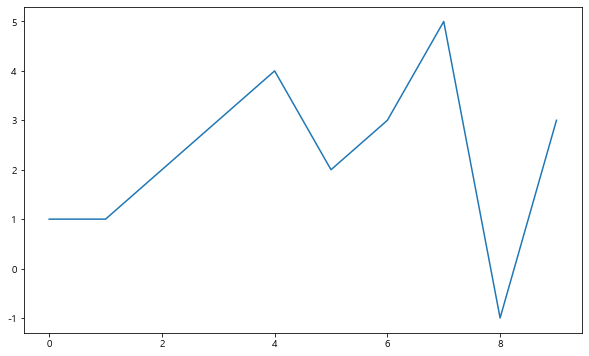

In [127]:
plt.figure(figsize=(10,6))
plt.plot([0,1,2,3,4,5,6,7,8,9], [1,1,2,3,4,2,3,5,-1,3])
plt.show()

### 예제1: 그래프 기초

#### 삼각함수 그리기
- np.arrange(a, b, s): a부터 b까지 s의 간격
- np.sin(value)

In [128]:
import numpy as np

t = np.arange(0, 12, 0.01)
y = np.sin(t)

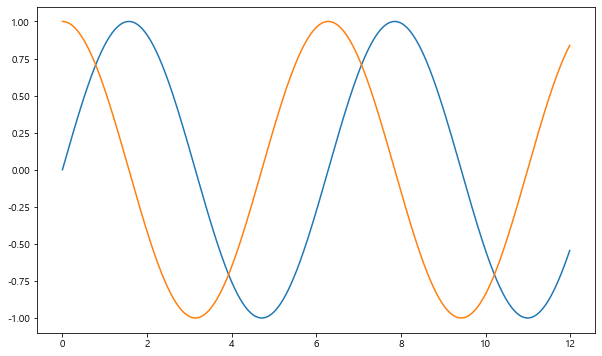

In [129]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.show()


- 1. 격자무늬 추가
- 2. 그래프 제목 추가
- 3. x축, y축 제목 추가
- 4. 주황색, 파란색 선 데이터 의미 구분

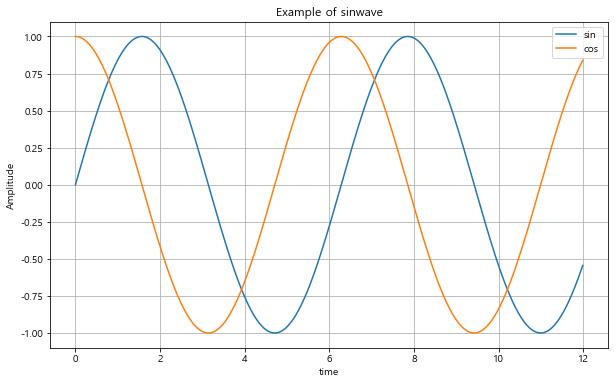

In [134]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid(True)
plt.legend(labels=["sin", "cos"]) #범례
plt.title("Example of sinwave")
plt.xlabel("time")
plt.ylabel("Amplitude") #진폭
plt.show()

In [138]:
def drawGraph():
    plt.figure(figsize=(10,6))
    plt.plot(t, np.sin(t), label="sin")
    plt.plot(t, np.cos(t), label="cos")
    plt.grid(True)
    plt.legend(loc="lower left") #범례
    plt.title("Example of sinwave")
    plt.xlabel("time")
    plt.ylabel("Amplitude") #진폭
    plt.show()

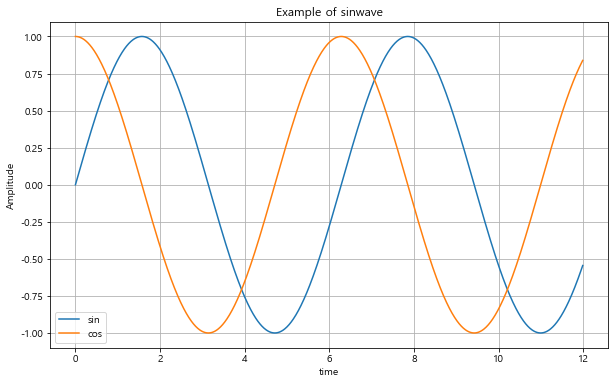

In [139]:
drawGraph()

## 예제2 그래프 커스텀

In [140]:
t = np.arange(0,5,0.5)
t

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

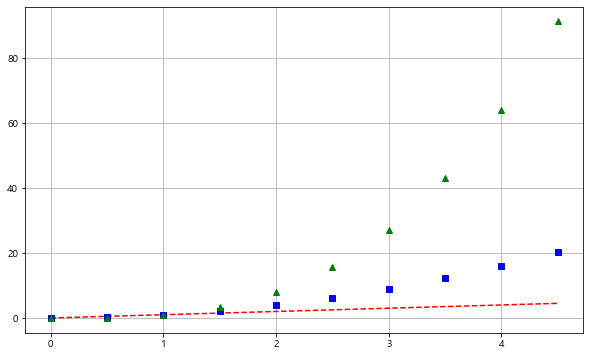

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(t, t, "r--")
plt.plot(t, t ** 2, "bs")
plt.plot(t, t ** 3, "g^")
plt.grid(True)
plt.show()


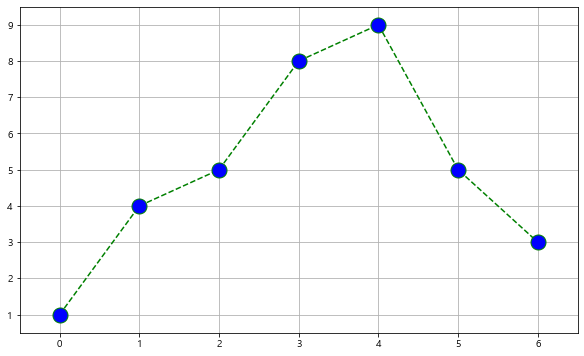

In [148]:
t = list(range(0,7))
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(
    t,
    y,
    color="green",
    linestyle="dashed",
    marker="o",
    markerfacecolor="blue",
    markersize=15,
)
plt.grid(True)
plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

### 예제3: scatter plot

In [149]:
t = np.array(range(0,10))
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

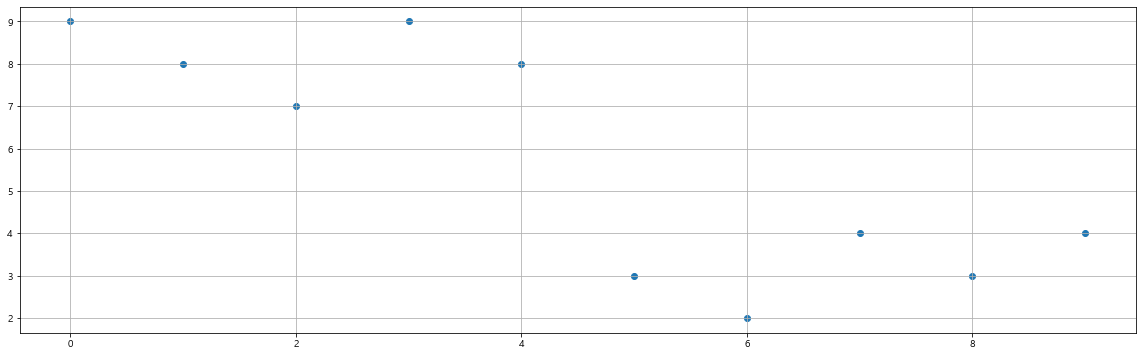

In [153]:
def drawGraph3():
    plt.figure(figsize=(20,6))
    plt.scatter(t,y)
    plt.grid(True)
    plt.show()
    
drawGraph3()

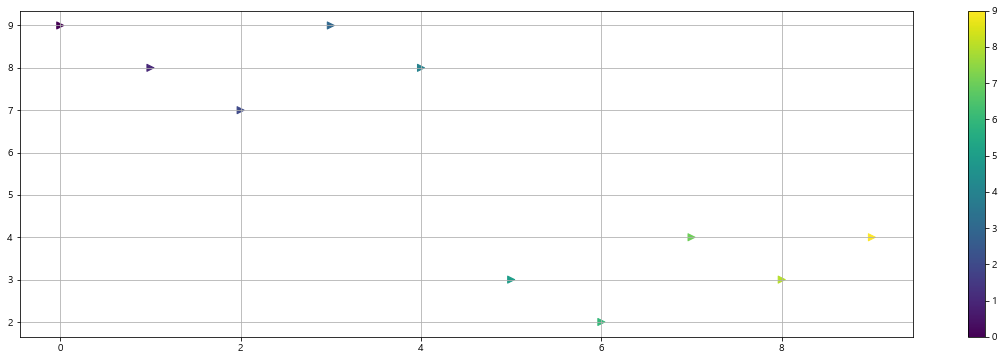

In [156]:
colormap = t

def drawGraph3():
    plt.figure(figsize=(20,6))
    plt.scatter(t,y, s=50, c=colormap, marker=">")
    plt.colorbar()
    plt.grid(True)
    plt.show()
    
drawGraph3()

### 예제4: pandas에서 plot 그리기
- matplotlib을 가져와서 사용함

In [157]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


<AxesSubplot:xlabel='구별'>

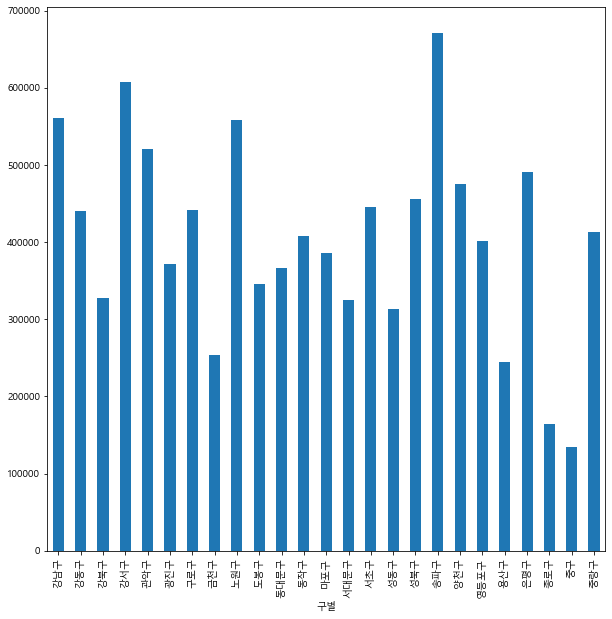

In [158]:
data_result["인구수"].plot(kind="bar", figsize=(10,10))

<AxesSubplot:ylabel='구별'>

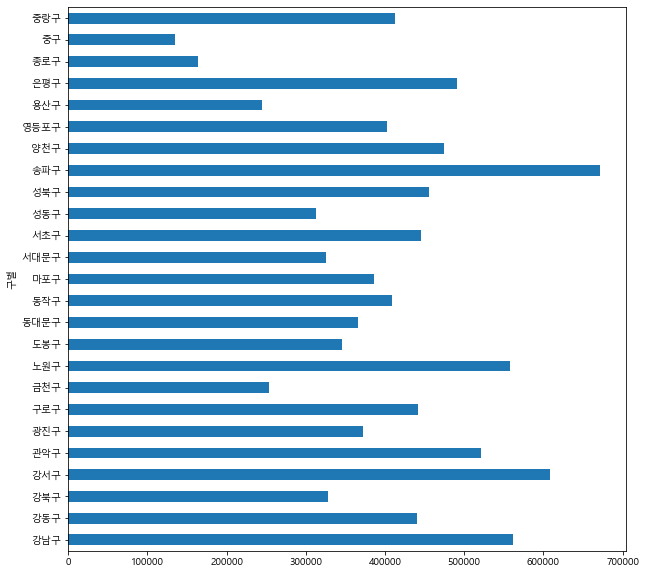

In [159]:
data_result["인구수"].plot(kind="barh", figsize=(10,10))

### 공식 문서가 답 -> 꼭 읽어보자

 ---

## 5. 데이터 시각화

In [162]:
import matplotlib.pyplot as plt
# import matplotlib as mpl

plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호 때문에 한글이 깨질 수가 있어 주는 설정
rc("font", family="Malgun Gothic")
# %matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")

In [163]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 소계 컬럼 시각화

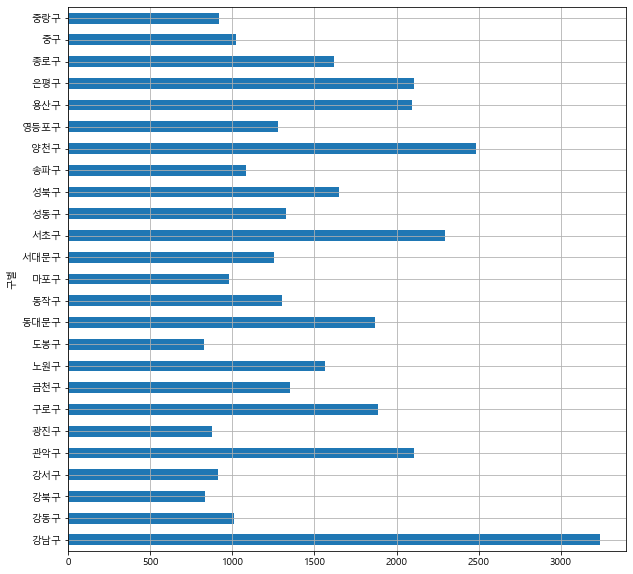

In [165]:
data_result["소계"].plot(kind="barh", grid=True, figsize=(10, 10));

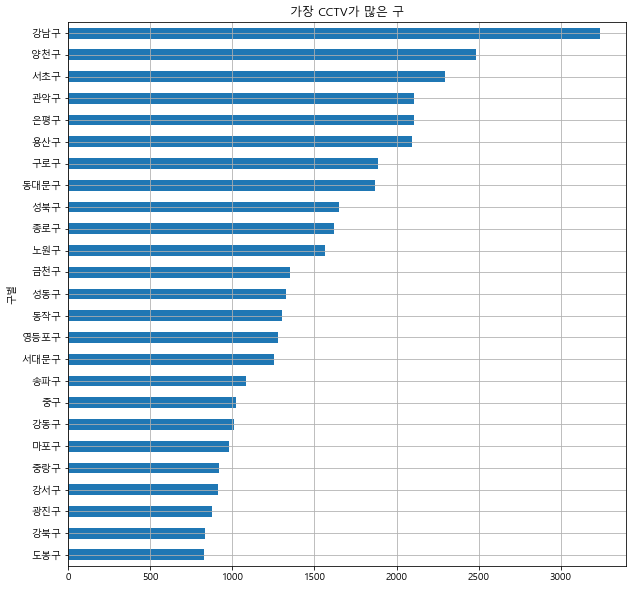

In [170]:
def drawGrapg():
    data_result["소계"].sort_values().plot(
        kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 10));
    
drawGrapg()

 ## 6. 데이터 경향 표시

In [171]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


##### 인구수와 소개 칼럼으로 scatter plot 그리기

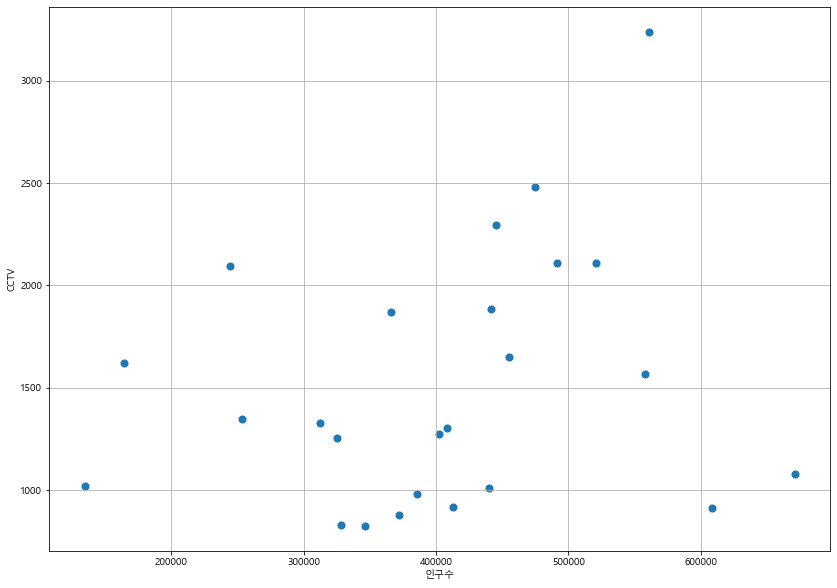

In [172]:
def drawGraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show()

drawGraph()

#### numpy를 이용한 1차 직선 만들기
- np.polyfit(): 직선을 구성하기 위한 계수를 계산
- np.poly1d(): polyfit 으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능

In [173]:
import numpy as np

In [174]:
fpl = np.polyfit(data_result["인구수"],data_result["소계"], 1 )

In [175]:
fpl

array([1.11155868e-03, 1.06515745e+03])

In [176]:
f1 = np.poly1d(fpl)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [177]:
f1(400000)

1509.7809252413338

- 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 cctv 수이다.

In [178]:
fx = np.linspace(100000, 700000, 100)

- 경향선을 그리기 위한 x 데이터 생성
- np.linspace(a, b, n): a부터 b까지 n개의 등간격 데이터 생성

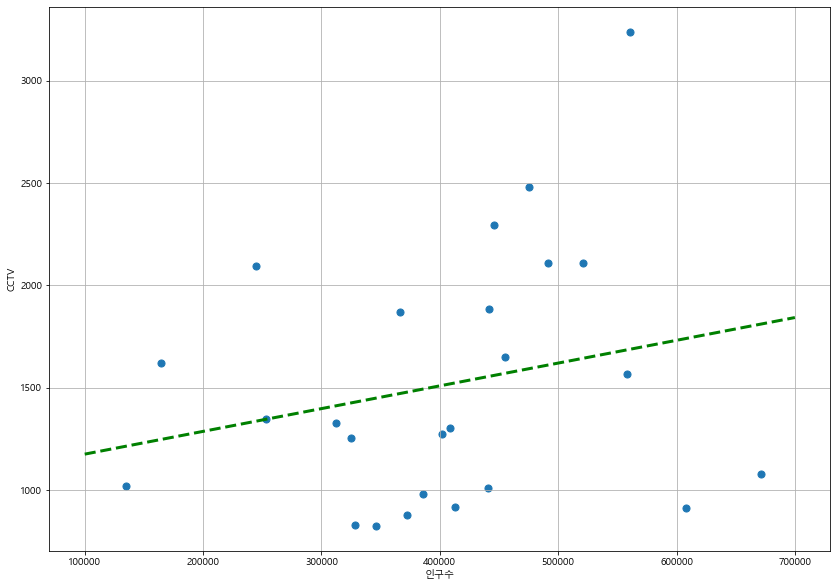

In [179]:
def drawGraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show()

drawGraph()

## 7. 강조하고 싶은 데이터를 시각화해보자

### 그래프 다듬기
#### 경향과의 오차 만들기
- 경향(trend)과의 오차를 만들자
- 경향은 f1 함수에 해당 인구를 입력
- f1(data_result["인구수"])

In [180]:
fp1 = np.polyfit(data_result["인구수"], data_result["소계"],1)

In [181]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

In [182]:
data_result["오차"] = data_result["소계"] - f1(data_result["인구수"])

In [183]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


In [184]:
# 경향과 비교해서 데이터의 오차가 너무 나는 데이터를 계산

df_sort_f = data_result.sort_values(by="오차", ascending=False) #내림차순
df_sort_t = data_result.sort_values(by="오차", ascending=True) #오름차순

In [185]:
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [186]:
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [187]:
 from matplotlib.colors import ListedColormap
    
# colormap 을 사용자 정의(user define)로 세팅
color_step = ["#e74c3c", "#2ecc71", "#95a9a6", "#2ecc71", "#3498db", "#3498db"]
my_cmap = ListedColormap(color_step)

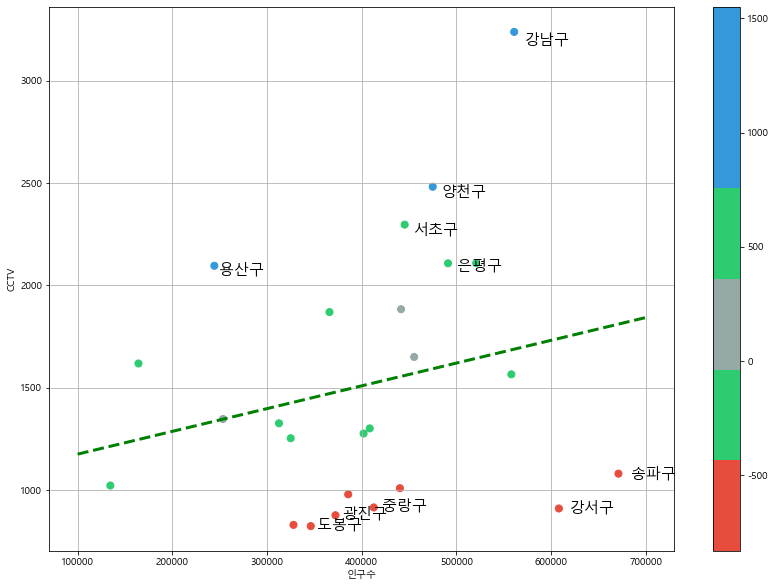

In [196]:
def drawGraph():
    plt.figure(figsize=(14,10))
    plt.scatter(data_result["인구수"], data_result["소계"], s=50, c=data_result["오차"], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")
    
    for n in range(5):
        # 상위 5개
        plt.text(
            df_sort_f["인구수"][n] * 1.02, # x 좌표
            df_sort_f["소계"][n] * 0.98, # y 좌표
            df_sort_f.index[n], # title
            fontsize=15
        )
        # 하위 5개
        plt.text(
            df_sort_t["인구수"][n] * 1.02, # x 좌표
            df_sort_t["소계"][n] * 0.98, # y 좌표
            df_sort_t.index[n], # title
            fontsize=15
        )
#     plt.text(df_sort_f["인구수"][0] * 1.02, df_sort_f["소계"][0] * 0.98, df_sort_f.index[0], fontsize=15)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid(True)
    plt.show()

drawGraph()

In [197]:
data_result.to_csv("../data/01. CCTV_result.csv", sep=",", encoding="utf-8")